In [1]:
#-*- coding: utf-8 -*- 

In [1]:
# bibliothèques 
from sklearn.neighbors import DistanceMetric
import statistics
#from scipy.spatial import distance
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from nltk import word_tokenize
import seaborn as sns
import pandas as pd
from time import perf_counter as pf 
import nltk
from nltk import StanfordTagger
from nltk.tag import StanfordPOSTagger
from textblob import TextBlob
import numpy as np
import glob, re, os
import spacy
import string
import json
from nltk import pos_tag, word_tokenize, RegexpParser


In [2]:
def lire_fichier(chemin):
    fichier = open(chemin, encoding='utf-8') 
    chaine = fichier.read()
    fichier.close()
    return chaine

def lire_fichier_lignes(chemin):
    with open(chemin, encoding='utf-8') as f:
        lignes = f.readlines()


def etiquetter_texte(t):
    jar = 'stanford-tagger-4.2.0/stanford-postagger-full-2020-11-17/stanford-postagger.jar'
    modele = 'stanford-tagger-4.2.0/stanford-postagger-full-2020-11-17/models/french-ud.tagger' 
    blob = TextBlob(t) 
    etiquetter = StanfordPOSTagger(modele, jar, encoding='utf-8')
    texte_etiquette = pos_tagger.tag(blob.split())
    print(texte_etiquette) 

In [3]:
# tous les articles de TALN
print("conférences TALN")
print("__"*50)
cpt1 = 1
for root1, dirs1 ,files1 in os.walk("../data/taln-archives-master/TALN/"):
    for file1 in files1:
        if file1.endswith(".txt"):
            liste_fichiers_taln = glob.glob(os.path.join(root1, file1))
            for chemin_taln in liste_fichiers_taln:
                docs1_taln = lire_fichier(chemin_taln)
                print(chemin_taln)
                print("taille du document", cpt1 ,":",len(docs1_taln), "caractères")
                nb_mots = len(docs1_taln.split())
                print(nb_mots, "mots environs")
                cpt1 += 1

conférences TALN
____________________________________________________________________________________________________
../data/taln-archives-master/TALN/TALN-2019/actes/96.txt
taille du document 1 : 17711 caractères
2577 mots environs
../data/taln-archives-master/TALN/TALN-2019/actes/93.txt
taille du document 2 : 11839 caractères
1773 mots environs
../data/taln-archives-master/TALN/TALN-2019/actes/16.txt
taille du document 3 : 30677 caractères
4781 mots environs
../data/taln-archives-master/TALN/TALN-2019/actes/95.txt
taille du document 4 : 15723 caractères
2357 mots environs
../data/taln-archives-master/TALN/TALN-2019/actes/34.txt
taille du document 5 : 28661 caractères
4393 mots environs
../data/taln-archives-master/TALN/TALN-2019/actes/50.txt
taille du document 6 : 43438 caractères
6623 mots environs
../data/taln-archives-master/TALN/TALN-2019/actes/39.txt
taille du document 7 : 28752 caractères
4356 mots environs
../data/taln-archives-master/TALN/TALN-2019/actes/42.txt
taille du doc

../data/taln-archives-master/TALN/TALN-2017/actes/63.txt
taille du document 339 : 25781 caractères
4105 mots environs
../data/taln-archives-master/TALN/TALN-2017/actes/123.txt
taille du document 340 : 4827 caractères
703 mots environs
../data/taln-archives-master/TALN/TALN-2017/actes/127.txt
taille du document 341 : 3217 caractères
488 mots environs
../data/taln-archives-master/TALN/TALN-2017/actes/125.txt
taille du document 342 : 4825 caractères
689 mots environs
../data/taln-archives-master/TALN/TALN-2017/actes/87.txt
taille du document 343 : 29223 caractères
4368 mots environs
../data/taln-archives-master/TALN/TALN-2017/actes/101.txt
taille du document 344 : 14804 caractères
2143 mots environs
../data/taln-archives-master/TALN/TALN-2017/actes/41.txt
taille du document 345 : 28783 caractères
4434 mots environs
../data/taln-archives-master/TALN/TALN-2017/actes/21.txt
taille du document 346 : 47554 caractères
7426 mots environs
../data/taln-archives-master/TALN/TALN-2017/actes/86.txt
t

../data/taln-archives-master/TALN/TALN-2013/actes/taln-2013-long-023.txt
taille du document 625 : 51466 caractères
8275 mots environs
../data/taln-archives-master/TALN/TALN-2013/actes/taln-2013-long-017.txt
taille du document 626 : 35919 caractères
5551 mots environs
../data/taln-archives-master/TALN/TALN-2013/actes/taln-2013-court-015.txt
taille du document 627 : 24015 caractères
1986 mots environs
../data/taln-archives-master/TALN/TALN-2013/actes/taln-2013-court-025.txt
taille du document 628 : 24804 caractères
1873 mots environs
../data/taln-archives-master/TALN/TALN-2013/actes/taln-2013-demo-008.txt
taille du document 629 : 5338 caractères
436 mots environs
../data/taln-archives-master/TALN/TALN-2013/actes/taln-2013-demo-002.txt
taille du document 630 : 6806 caractères
480 mots environs
../data/taln-archives-master/TALN/TALN-2013/actes/taln-2013-charte-001.txt
taille du document 631 : 2511 caractères
377 mots environs
../data/taln-archives-master/TALN/TALN-2013/actes/taln-2013-demo

../data/taln-archives-master/TALN/TALN-2015/actes/taln-2015-court-012.txt
taille du document 993 : 21602 caractères
3232 mots environs
../data/taln-archives-master/TALN/TALN-2015/actes/taln-2015-long-005.txt
taille du document 994 : 38878 caractères
5850 mots environs
../data/taln-archives-master/TALN/TALN-2015/actes/taln-2015-long-021.txt
taille du document 995 : 49137 caractères
7844 mots environs
../data/taln-archives-master/TALN/TALN-2015/actes/taln-2015-court-025.txt
taille du document 996 : 24342 caractères
3665 mots environs
../data/taln-archives-master/TALN/TALN-2015/actes/taln-2015-court-010.txt
taille du document 997 : 28235 caractères
4593 mots environs
../data/taln-archives-master/TALN/TALN-2015/actes/taln-2015-demo-008.txt
taille du document 998 : 7061 caractères
1090 mots environs
../data/taln-archives-master/TALN/TALN-2015/actes/taln-2015-court-005.txt
taille du document 999 : 26668 caractères
4148 mots environs
../data/taln-archives-master/TALN/TALN-2015/actes/taln-2015

../data/taln-archives-master/TALN/TALN-2003/actes/taln-2003-long-010.txt
taille du document 1439 : 29897 caractères
4372 mots environs
../data/taln-archives-master/TALN/TALN-2003/actes/taln-2003-long-025.txt
taille du document 1440 : 28165 caractères
4180 mots environs
../data/taln-archives-master/TALN/TALN-2003/actes/taln-2003-poster-017.txt
taille du document 1441 : 17394 caractères
2531 mots environs
../data/taln-archives-master/TALN/TALN-2003/actes/taln-2003-long-006.txt
taille du document 1442 : 22223 caractères
3330 mots environs
../data/taln-archives-master/TALN/TALN-2003/actes/taln-2003-long-009.txt
taille du document 1443 : 30157 caractères
4832 mots environs
../data/taln-archives-master/TALN/TALN-2003/actes/taln-2003-long-018.txt
taille du document 1444 : 30402 caractères
4698 mots environs
../data/taln-archives-master/TALN/TALN-2003/actes/taln-2003-poster-012.txt
taille du document 1445 : 17333 caractères
2641 mots environs
../data/taln-archives-master/TALN/TALN-2003/actes/t

In [4]:
# tous les articles RECITAL
print("conférences RECITAL")
print("__"*50)
cpt2 = 1
for root2, dirs2 ,files2 in os.walk("../data/taln-archives-master/RECITAL/"):
    for file2 in files2:
        if file2.endswith(".txt"):
            liste_fichiers_RECITAL = glob.glob(os.path.join(root2, file2))
            for chemin_recital in liste_fichiers_RECITAL:
                docs2_recital = lire_fichier(chemin_recital)
                print(chemin_recital)
                print("taille du document", cpt2 ,":",len(docs2_recital), "caractères")
                nb_mots = len(docs2_recital.split())
                print(nb_mots, "mots environs")
                cpt1 += 1

conférences RECITAL
____________________________________________________________________________________________________
../data/taln-archives-master/RECITAL/RECITAL-2016/actes/4.txt
taille du document 1 : 37335 caractères
6108 mots environs
../data/taln-archives-master/RECITAL/RECITAL-2016/actes/2.txt
taille du document 1 : 43106 caractères
7017 mots environs
../data/taln-archives-master/RECITAL/RECITAL-2016/actes/12.txt
taille du document 1 : 42999 caractères
6792 mots environs
../data/taln-archives-master/RECITAL/RECITAL-2016/actes/9.txt
taille du document 1 : 43391 caractères
6574 mots environs
../data/taln-archives-master/RECITAL/RECITAL-2016/actes/11.txt
taille du document 1 : 27784 caractères
4127 mots environs
../data/taln-archives-master/RECITAL/RECITAL-2016/actes/7.txt
taille du document 1 : 32982 caractères
5179 mots environs
../data/taln-archives-master/RECITAL/RECITAL-2016/actes/10.txt
taille du document 1 : 36715 caractères
5291 mots environs
../data/taln-archives-master/

../data/taln-archives-master/RECITAL/RECITAL-2004/actes/recital-2004-poster-003.txt
taille du document 1 : 17891 caractères
2834 mots environs
../data/taln-archives-master/RECITAL/RECITAL-2004/actes/recital-2004-poster-010.txt
taille du document 1 : 14899 caractères
2432 mots environs
../data/taln-archives-master/RECITAL/RECITAL-2004/actes/recital-2004-poster-017.txt
taille du document 1 : 16859 caractères
2566 mots environs
../data/taln-archives-master/RECITAL/RECITAL-2004/actes/recital-2004-poster-006.txt
taille du document 1 : 15921 caractères
2599 mots environs
../data/taln-archives-master/RECITAL/RECITAL-2004/actes/recital-2004-long-006.txt
taille du document 1 : 29825 caractères
4648 mots environs
../data/taln-archives-master/RECITAL/RECITAL-2004/actes/recital-2004-poster-013.txt
taille du document 1 : 16521 caractères
2470 mots environs
../data/taln-archives-master/RECITAL/RECITAL-2004/actes/recital-2004-long-002.txt
taille du document 1 : 28790 caractères
4367 mots environs
../

In [5]:
with open("../data/taln-archives-master/RECITAL/RECITAL-2008/actes/recital-2008-long-001.txt") as f:
    lignes = f.readlines()
print(type(lignes))
#print(lignes)

<class 'list'>


In [9]:
tampon = ""
seuil_paragraphe = 2000
liste_paragraphes = []

for cpt, par in enumerate(lignes):
    if len(par)<10:
        continue
    if len(tampon)>seuil_paragraphe:
        liste_paragraphes.append(tampon)
        tampon = ""
        if len(par)>seuil_paragraphe:
            liste_paragraphes.append(par)
        else:
            tampon+=par
        
    elif len(par)>seuil_paragraphe:
        liste_paragraphes.append(par)
    else:
        tampon +=par
for p in liste_paragraphes:
    print(p)
    print("_____"*20)

RECITAL 2008, Avignon, 9–13 juin 2008
Méthode de réordonnancement de réponses par
transformation d’arbres : présentation et analyse des
résultats
Guillaume Bernard1
(1) LIMSI - CNRS, B.P. 133, 91403 ORSAY, France
gbernard@limsi.fr
Résumé. Dans cet article nous présentons une évaluation et une analyse des résultats d’une
méthode de réordonnancement de réponses pour un système de questions-réponses. Cette méthode propose une sélection des réponses candidates à une question en calculant un coût par
transformation d’arbres. Nous présentons une analyse des résultats obtenus sur le corpus Clef
2004-2005 et nos conclusions sur les voies d’amélioration possibles pour notre système.
Abstract. This paper describes an evaluation and an analysis of the results of an answers
reranking method for a question-answering system. Candidate answers to a question are reordered by computing a tree transform cost. We discuss the results of our evaluation on the Clef
2004-2005 corpus and describe possible imp

In [7]:
# à développer, séparer selon les titres 
tampon = ""
seuil_paragraphe = 2000
liste_paragraphes = []
for cpt, par in enumerate(lignes):
    motif = re.search("^\d\s+\w.{1,}|\d\\.\d\s+\w.{1,}|^\d\\.\d\\.d\s+\w.{1,}|^\d\\.\d\\.d\\.\s+\w.{1,}", par)  
    if motif:
        par = par
        print(par)

1 Introduction

2 Ritel, un système de questions-réponses oral et interactif

3 Réordonnancement des réponses candidates

4 Évaluation du système

4.1 Cadre expérimental

4.2 Analyse de l’évaluation

5 Étude du corpus de questions et des résultats obtenus

5.1 Corpus étudié

5.2 Méthodologie

5.3 Résultats de l’analyse

5.3.1 Problèmes liés aux sous-nœuds

5.3.2 Perte d’information liée à l’extraction de la phrase

5.3.3 Ajout de relations entre les nœuds

6 Conclusions et perspectives



In [10]:
print(type(liste_paragraphes))
print("nombre de paragraphes : ",len(liste_paragraphes))

<class 'list'>
nombre de paragraphes :  16


In [11]:
# caratérsitiques de chaque paragraphe qui seront peut-être utiles 
X_stylo = []
for paragraphe, texte in enumerate(liste_paragraphes): 
    
    paragraphe = paragraphe
    liste_mots1 = texte.split()
    phrases1 = texte.split(". ")
    NB_phrases1 = len(phrases1)
    NB_mots1 = len(liste_mots1)
    NB_caracteres1 = len(texte)
    moyenne_taille_mots1 = statistics.mean([len(x) for x in liste_mots1])
    moyenne_taille_phrases1 = NB_mots1/NB_phrases1
    caracteristiques1 = [NB_phrases1, NB_mots1, NB_caracteres1, moyenne_taille_mots1, moyenne_taille_phrases1]
    
    if paragraphe < len(liste_paragraphes)-1:
        paragraphe2 = liste_paragraphes[paragraphe+1]
        liste_mots2 = texte.split()
        phrases2 = texte.split(". ")
        NB_phrases2 = len(phrases2)
        NB_mots2 = len(liste_mots2)
        NB_caracteres2 = len(texte)
        moyenne_taille_mots2 = statistics.mean([len(x) for x in liste_mots2])
        moyenne_taille_phrases2 = NB_mots2/NB_phrases1
        caracteristiques2 = [NB_phrases2, NB_mots2, NB_caracteres2, moyenne_taille_mots2, moyenne_taille_phrases2]
        
caracteristiques = [caracteristiques1, caracteristiques2]

In [12]:
print("caractéristiques du paragraphe 1 : ", caracteristiques1)
print()
print("caractéristiques du paragraphe suivant : ", caracteristiques2)

caractéristiques du paragraphe 1 :  [39, 304, 2044, 5.723684210526316, 7.794871794871795]

caractéristiques du paragraphe suivant :  [16, 302, 2093, 5.927152317880795, 18.875]


In [13]:
print("les caractéristiques de chaque paragraphe dans une seule liste : \n", caracteristiques)

les caractéristiques de chaque paragraphe dans une seule liste : 
 [[39, 304, 2044, 5.723684210526316, 7.794871794871795], [16, 302, 2093, 5.927152317880795, 18.875]]


In [14]:
X_stylo.append(caracteristiques)
print(X_stylo)

[[[39, 304, 2044, 5.723684210526316, 7.794871794871795], [16, 302, 2093, 5.927152317880795, 18.875]]]


In [15]:
# vectoriser le document 
V = TfidfVectorizer(encoding='utf-8', analyzer='word')
#X = V.fit_transform(liste_paragraphes).todense()
X = V.fit_transform(liste_paragraphes).toarray()
print(type(X))
#for distance in ["braycurtis"]:
    #distance = DistanceMetric.get_metric(distance)
print(X.shape)


from scipy.spatial import distance
for cpt, vecteur in enumerate(X):
    vecteur = vecteur #!
    if cpt < len(liste_paragraphes)-1:
        vecteur2 = X[cpt+1]
        #print(distance)
        #similarite = cpt, distance.pairwise(vecteur, vecteur2)
        similarite_cosine = ("paragraphe ",cpt, distance.cosine(vecteur, vecteur2))
        #print(similarite)
        print(similarite_cosine)

<class 'numpy.ndarray'>
(16, 1184)
('paragraphe ', 0, 0.6118087721076215)
('paragraphe ', 1, 0.5216953076589974)
('paragraphe ', 2, 0.4731329958614173)
('paragraphe ', 3, 0.5545425814364113)
('paragraphe ', 4, 0.44761322730386754)
('paragraphe ', 5, 0.4863907500012139)
('paragraphe ', 6, 0.6109576435382881)
('paragraphe ', 7, 0.5912560149765507)
('paragraphe ', 8, 0.5514411587448387)
('paragraphe ', 9, 0.7227734015663633)
('paragraphe ', 10, 0.6504420750360135)
('paragraphe ', 11, 0.4734697978145014)
('paragraphe ', 12, 0.5632143539169405)
('paragraphe ', 13, 0.692017467230908)
('paragraphe ', 14, 0.8346390112475064)


In [16]:
#print(liste_paragraphes[0])
#print("__"*20)
#print(liste_paragraphes[-1])

Text(0.5, 1.0, 'Clusters des paragraphes')

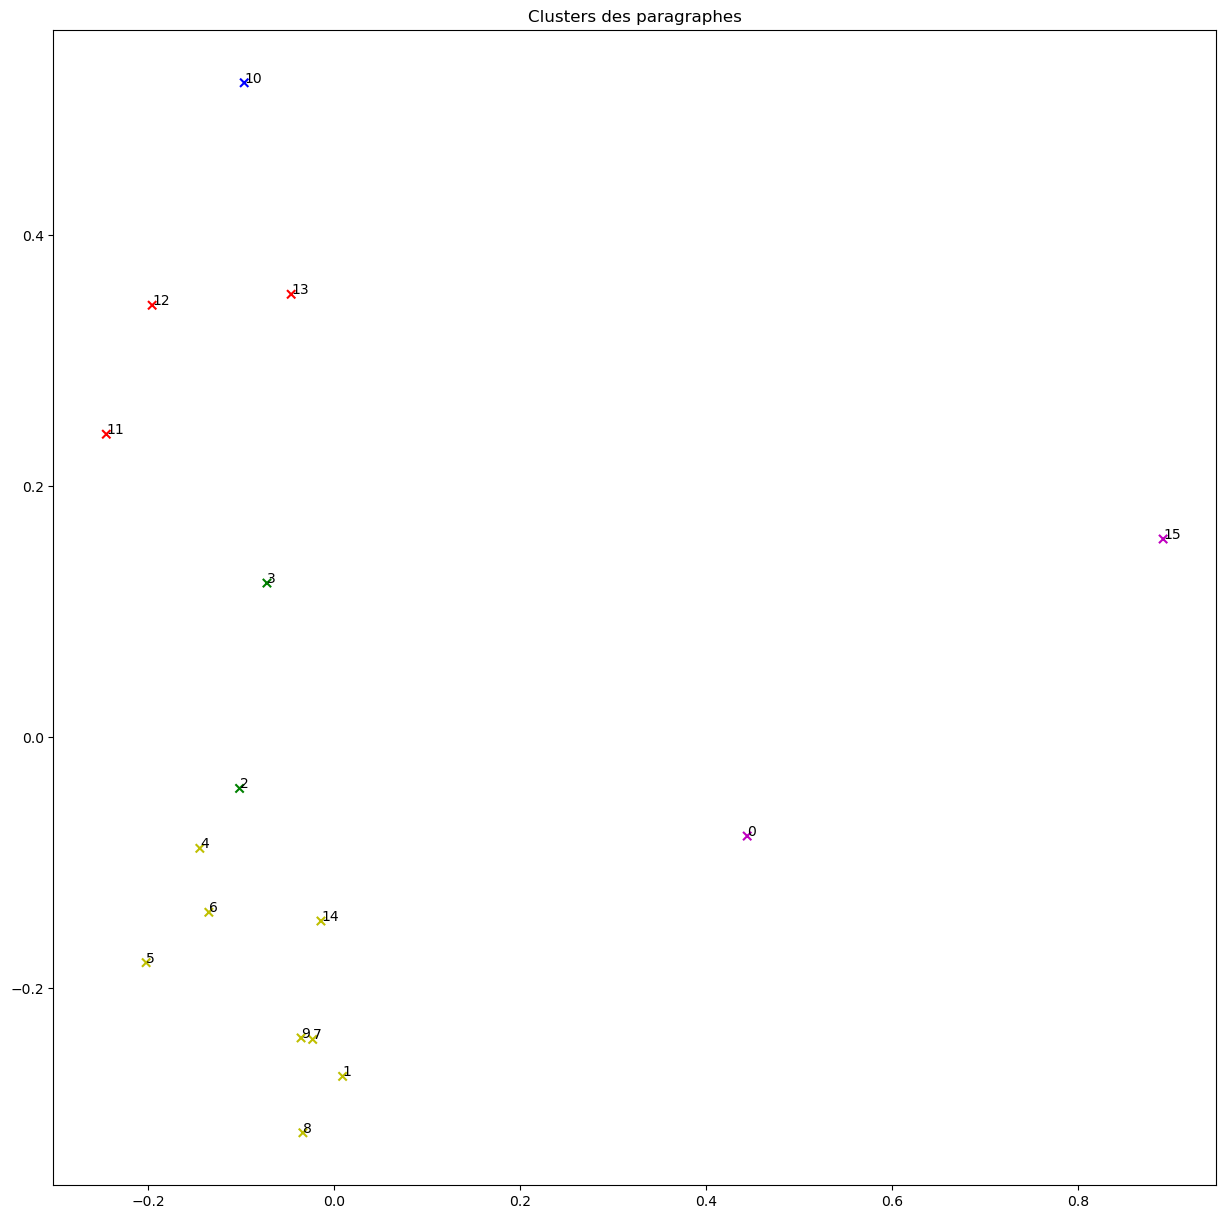

In [17]:
# cluster pour les tokens 

vecteurs = X
km = KMeans(n_clusters=5,init = 'k-means++', random_state = 0, max_iter=300)
predire_clusters = km.fit_predict(vecteurs)

pca = PCA(n_components=3)
nuage_points = pca.fit_transform(vecteurs)

colors = ["b", "y", "r", "g", "m" ]

abscisses_x = [o[0] for o in nuage_points]
ordonnees_y = [o[1] for o in nuage_points]
fig, ax = plt.subplots(figsize=(15,15))

scatter = ax.scatter(abscisses_x, ordonnees_y, c=[colors[d] for d in predire_clusters], marker='x')
centroides = km.cluster_centers_


for i, txt in enumerate(vecteurs):
    ax.annotate(i, (abscisses_x[i], ordonnees_y[i]))

ax.set_facecolor("white")
plt.title("Clusters des paragraphes")


In [18]:
modele = spacy.load('fr_core_news_md')

In [19]:
# étiquetter le document 
texte_etiquettes = []
for par in liste_paragraphes:
    liste_tokens = modele(par)
    liste_etiquettes = [token.pos_ for token in liste_tokens]
    texte_etiquettes.append(" ".join(liste_etiquettes))
print(type(liste_etiquettes))
print("nombre étiquettes paragraphes 1 : ", len(texte_etiquettes[0]))
print("nombre étiquettes paragraphes 2 : ", len(texte_etiquettes[1]))
print()
print("nombre de paragraphes étiquettés : ", len(texte_etiquettes))
print()
print("paragraphe étiquetté 1 : ", texte_etiquettes[0])

<class 'list'>
nombre étiquettes paragraphes 1 :  1773
nombre étiquettes paragraphes 2 :  2087

nombre de paragraphes étiquettés :  16

paragraphe étiquetté 1 :  NOUN NUM PUNCT PROPN PUNCT PROPN NOUN NUM SPACE NOUN ADP NOUN ADP NOUN ADP SPACE NOUN ADP NOUN PUNCT NOUN CCONJ NOUN ADP SPACE NOUN SPACE PROPN PROPN SPACE PUNCT NUM PUNCT NOUN PUNCT PROPN PUNCT NOUN NUM PUNCT NUM NOUN PUNCT PROPN SPACE PROPN SPACE NOUN PUNCT ADP DET NOUN PRON VERB DET NOUN CCONJ DET NOUN ADP NOUN ADP DET SPACE NOUN ADP NOUN ADP NOUN ADP DET NOUN ADP NOUN PRON NOUN PUNCT DET NOUN VERB DET NOUN ADP NOUN ADJ ADP DET NOUN ADP VERB DET NOUN ADP SPACE NOUN ADP NOUN PUNCT PRON VERB DET NOUN ADP NOUN VERB ADP DET NOUN NOUN SPACE NOUN NOUN NOUN CCONJ DET NOUN ADP DET NOUN ADP NOUN ADJ ADP DET NOUN PUNCT SPACE NOUN PUNCT NOUN X NOUN NOUN NOUN X X X X X X X NOUN X SPACE NOUN X X X NOUN PUNCT X PROPN PUNCT NOUN X X VERB NOUN X X X X AUX X VERB ADV PUNCT X NOUN X X X X NOUN PRON X X SPACE NOUN NOUN NUM NOUN X NOUN ADJ NOU

In [26]:
#from scipy.spatial import distance
V = TfidfVectorizer(ngram_range=(1,2))
X_pos = V.fit_transform(texte_etiquettes).toarray()
#X_pos = V.fit_transform(texte_etiquettes).todense()
for cpt, vecteur in enumerate(X_pos):
    vecteur = vecteur
    if cpt<len(texte_etiquettes)-1:
        vecteur2 = X_pos[cpt+1]
        #similarite = cpt, distance.pairwise(vecteur, vecteur2) #todense
        similarite_cosine = cpt, distance.cosine(vecteur, vecteur2)
        print(similarite_cosine)
        #print(similarite)
#distances = distance.pairwise(X_pos) # todense
#ax = sns.heatmap(distances)

(0, 0.04045125758262602)
(1, 0.026125086667213138)
(2, 0.025158150531368273)
(3, 0.04001038867302564)
(4, 0.028421487009181456)
(5, 0.07598267660499791)
(6, 0.11038849384938387)
(7, 0.058107846510542904)
(8, 0.04023044344379412)
(9, 0.06699009997737337)
(10, 0.0718443844470894)
(11, 0.028324481407012714)
(12, 0.06934760691464803)
(13, 0.07501710666210037)
(14, 0.27868270997700617)


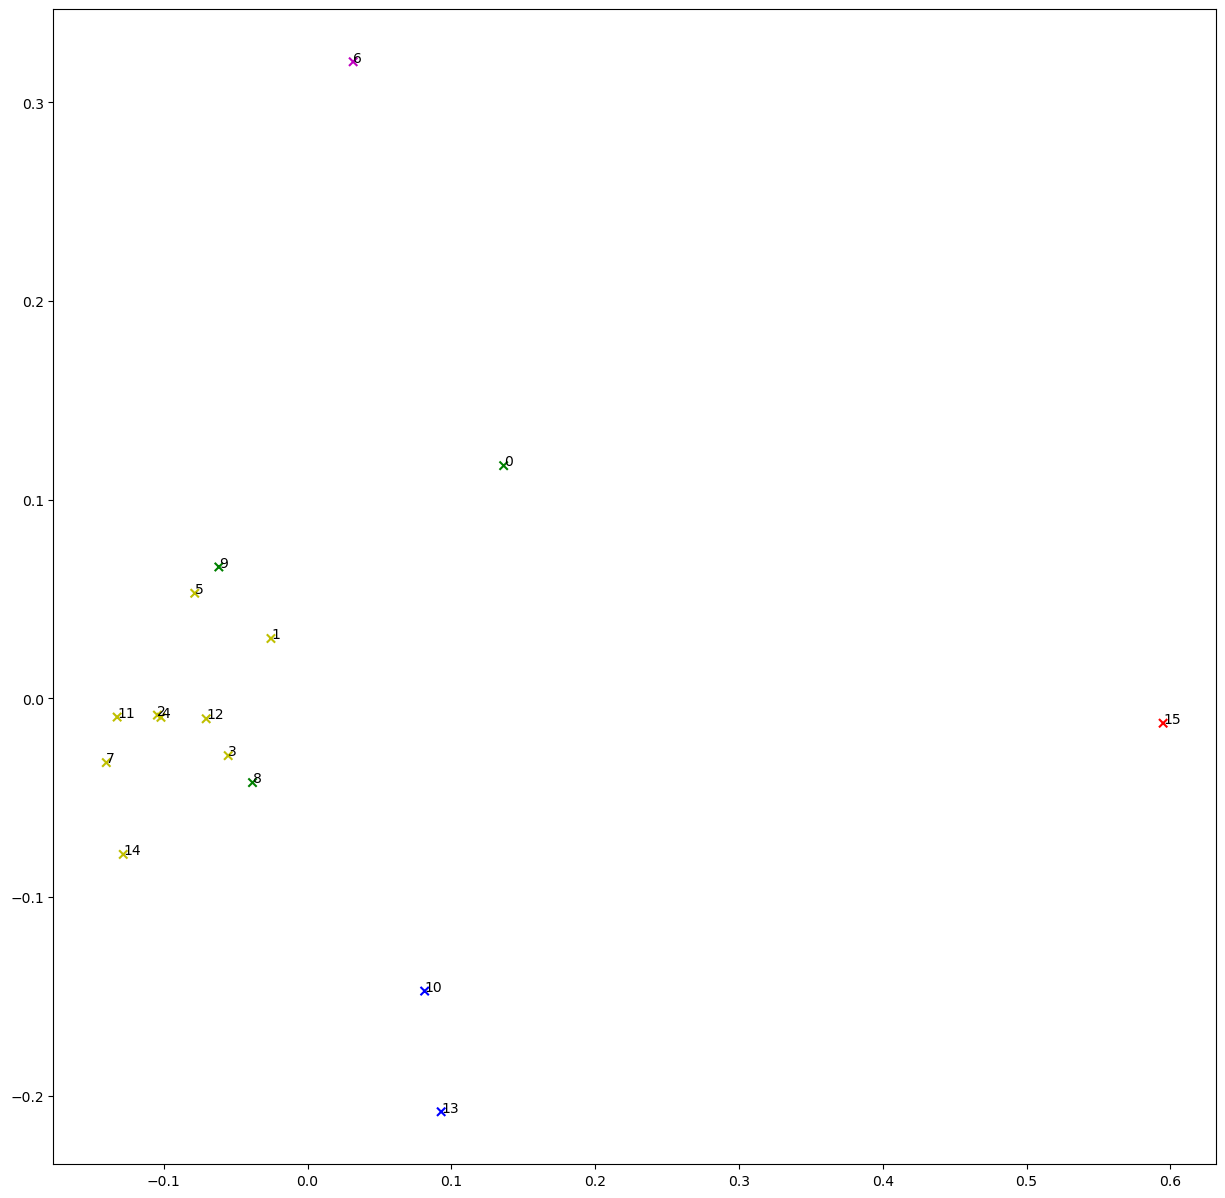

In [27]:
# clusters pour les uni-grammes d'étiquettes # essayer avec les bi-grammes, tri-grammes...
vecteurs = X_pos
km = KMeans(n_clusters=5,init = 'k-means++', random_state = 0, max_iter=500)
predire_clusters = km.fit_predict(vecteurs)

pca = PCA(n_components=3)
nuage_points = pca.fit_transform(vecteurs)

colors = ["b", "y", "r", "g", "m" ]

abscisses_x = [o[0] for o in nuage_points]
ordonnees_y = [o[1] for o in nuage_points]

fig, ax = plt.subplots(figsize=(15,15))

scatter = ax.scatter(abscisses_x, ordonnees_y,c=[colors[d] for d in predire_clusters], marker='x')


centroides = km.cluster_centers_

cen_x = [i[0] for i in centroides] 
cen_y = [i[1] for i in centroides]


for i, txt in enumerate(vecteurs):
    ax.annotate(i, (abscisses_x[i], ordonnees_y[i]))

ax.set_facecolor("white")

In [28]:
print(cen_x)
print(cen_y)

[0.12696473439183148, 0.1338717463258132, 0.10094184322095852, 0.08488357442058836, 0.06092546419316043]
[0.0, 0.004163377019827837, 0.021691380734286583, 0.004522461587087103, 0.0]


In [29]:
#print(km.labels_)

In [30]:
# calcul du taux de lexicalité avec le glaff  

with open("../data/GLAFF-1.2.2/glaff-1.2.2.txt",encoding='utf-8') as f:
    ligne = f.readline()
    cpt = 0 
    dic_glaff = {}
    while len(ligne) > 0:
        cpt += 1
        elements = re.split("\|", re.sub("\n", "", ligne))
        frequence = 0 
        forme = elements[0]
        for index in range(6, len(elements)+1, 2):
            frequence += float(elements[index])
        dic_glaff[forme] = frequence
        ligne = f.readline()
with open("freq_glaff_%i.json"%cpt, "w") as w:
    w.write(json.dumps(dic_glaff))
set_mots_glaff = set(dic_glaff.keys())
print("taille glaff : %i types"%len(set_mots_glaff))

taille glaff : 1082688 types


In [31]:
with open("freq_glaff_1406857.json", encoding='utf-8') as f:
        glaff = json.load(f)
        set_mots_GLAFF = set(glaff)

In [32]:
# lexique de chaque paragraphe 
# créer un vocabulaire des paragraphes 

vocabulaire_paragraphe = set()

for paragraphe, texte in enumerate (liste_paragraphes):
    print()
    print("paragraphe : ", paragraphe)
    paragraphe = paragraphe
    lexique = re.findall("[a-zA-ZÀ-ÿ][a-zA-ZÀ-ÿ-]*", texte)
    set_mots_lexique = set(lexique)
    
    communs = vocabulaire_paragraphe.intersection(set_mots_GLAFF)
    manquants = set_mots_lexique.difference(set_mots_GLAFF)
    
    
    print("absents dans le glaff --->",len(manquants), list(manquants)[:5])
    for x in set_mots_lexique:
        vocabulaire_paragraphe.add(x)
    #try:
        #proportion_mots_nouveaux = "Proportion mots nouveaux : %f"%(1-(len(communs)/len(set_mots_lexique))) # j'ai une erreur de division par zéro
    #except:
        #Exception
    #print(proportion_mots_nouveaux)
    #print("---"*10)
    #print("communs avec le glaff : ", communs)
    print("présents dans le glaff --->", len(communs))
    
    
    # on a besoin des fréquences de tokens pour calculer le taux de lexicalité de chaque paragraphe 
    
    dic_freq = {} # dictionnaire pour stocker nb apparitions de chaque mots
    for mot in lexique:
        if mot not in dic_freq:
            dic_freq[mot] = 1
        else:
            dic_freq[mot] += 1
    paires = [[effectif, mot] for mot, effectif in dic_freq.items()] 
    liste_tri = sorted(paires, reverse=True)[:5] 
    plus_freq = set([mot for effectif, mot in liste_tri])
    print("mots fréquents du paragraphe --->", paragraphe,"-->",liste_tri)
    
    # taux de lexicalité 
    taux_de_lexicalite = len(communs)/len(dic_freq)
    
    print("taux de lexicalité --->", taux_de_lexicalite)


paragraphe :  0
absents dans le glaff ---> 66 ['Notre', 'transform', 'questions-réponses', 's', 'LIMSI']
présents dans le glaff ---> 0
mots fréquents du paragraphe ---> 0 --> [[13, 'de'], [10, 'une'], [10, 'des'], [7, 'question'], [7, 'd']]
taux de lexicalité ---> 0.0
paragraphe particulier

paragraphe :  1
absents dans le glaff ---> 28 ['En', 'etc', 'questions-réponses', 'LIMSI', 'Deux']
présents dans le glaff ---> 108
mots fréquents du paragraphe ---> 1 --> [[26, 'de'], [10, 'et'], [10, 'des'], [9, 'd'], [8, 'un']]
taux de lexicalité ---> 0.6101694915254238

paragraphe :  2
absents dans le glaff ---> 30 ['Cette', 'Au', 'De', 'Ritel', 'On']
présents dans le glaff ---> 217
mots fréquents du paragraphe ---> 2 --> [[22, 'de'], [16, 'la'], [10, 'les'], [10, 'et'], [7, 'un']]
taux de lexicalité ---> 1.3821656050955413

paragraphe :  3
absents dans le glaff ---> 31 ['En', 'Ces', 'Avec', 'Notre', 'Andrew']
présents dans le glaff ---> 282
mots fréquents du paragraphe ---> 3 --> [[13, 'des'],

In [33]:
# motifs syntaxiques 
# calcul de la fréquence des étiquettes par n-grammes  
# sortir la fréquence de chaque motif par ex SCONJ DET NOUN dans chaque paragraphe 
#lemmatisation indispensable

In [21]:
# on essaie avec la pondération tf - idf 